#How to Run a Lasso Regression

In [1]:
# Import necessary packages
import sklearn as sk
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

##1) Import the data into Google CoLab and Clean the Data

In [3]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/Econ 441B/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.loc[df["sex"] == "female", "sex"] = 1
df.loc[df["sex"] == "male", "sex"] = 0
df.loc[df["smoker"] == "yes", "smoker"] = 1
df.loc[df["smoker"] == "no", "smoker"] = 0

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["region"] = le.fit_transform(df["region"])

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


##2) Split the data into 80/20, in/out sample

In [8]:
data = np.array(df.iloc[:,:-1])
target = np.array(df.iloc[:,-1])

In [9]:
# This could also be done using the train_test_split
cut = int((len(data) * .8) // 1)

in_data = data[:cut]
out_data = data[cut:]
in_target = target[:cut]
out_target = target[cut:]

##3) Normalize the data

In [10]:
scaler = preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)

out_data_scale = scaler.transform(out_data)

##4) Get lambda from Lasso cross validation

In [11]:
modCV = LassoCV().fit(in_data_scale, in_target)
a = modCV.alpha_  # optimized lambda
print("Lambda is equal to", a)

Lambda is equal to 133.34880015958146


##5) Run a lambda regression with that lambda

In [12]:
mod1 = Lasso(alpha = a).fit(in_data_scale, in_target)
mod1.predict(np.array(in_data_scale))
mod1.coef_

array([3564.26137833,    0.        , 1890.8527485 ,  398.24050447,
       9324.84227138, -326.52198757])

##6) Visualize the coefficients

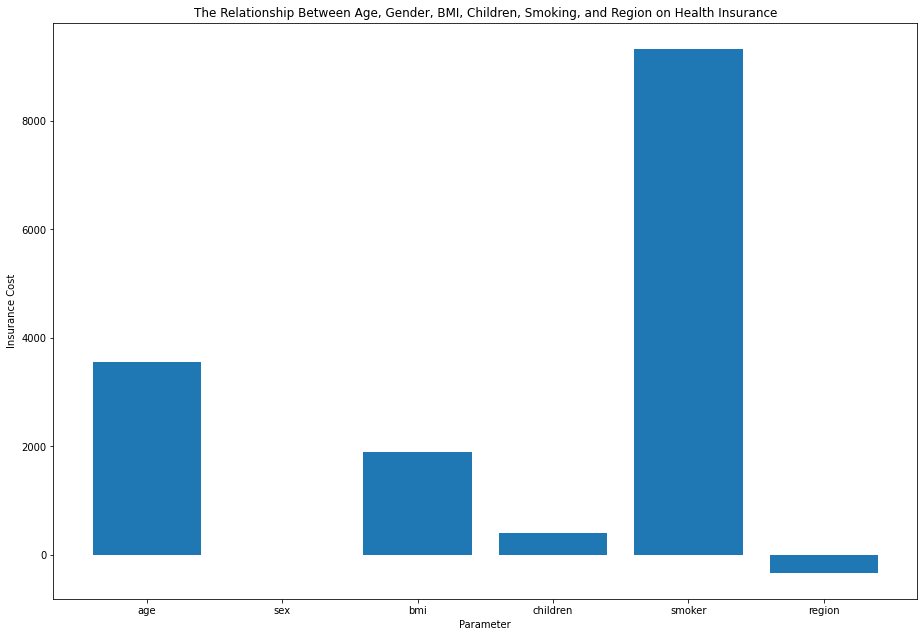

In [13]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_axes([0,0,1,1])
ax.bar(df.columns[:-1], mod1.coef_)
plt.title("The Relationship Between Age, Gender, BMI, Children, Smoking, and Region on Health Insurance")
plt.xlabel("Parameter")
plt.ylabel("Insurance Cost")
plt.show()

##7) Interpret the coefficients

Using the Lasso regression with the optimal lambda, 133.35, the variable smoker has the largest effect on the outcome variable. This means that someone who smokes is likely to pay more for health insurance. The variables age, BMI, children, and region also have positive coefficients. Therefore, being older, having a higher BMI, and having more children have a positive relationship with health insurance rates.

##8) Compare in and out of sample MSE's

In [14]:
in_predict = mod1.predict(in_data_scale)

In [15]:
out_predict = mod1.predict(out_data_scale)

In [16]:
in_MSE = np.square(np.subtract(in_target, in_predict)).mean()
out_MSE = np.square(np.subtract(out_target, out_predict)).mean()
print(in_MSE)
print(out_MSE)

36490415.101693384
37252730.724018715
